In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('training.csv')
#df_test= pd.read_csv('test.csv')

numerical_columns = train.select_dtypes(include=['int', 'float']).columns
object_columns = train.select_dtypes(include=['object']).columns

# Start with data understanding:

In [3]:
train.head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [4]:
train.describe()

patient_id  patient_zip3   patient_age          bmi    population  \
count   12906.000000  12906.000000  12906.000000  3941.000000  12905.000000   
mean   547381.196033    573.754300     59.183326    28.984539  20744.441237   
std    260404.959974    275.447534     13.335216     5.696906  13886.903756   
min    100063.000000    101.000000     18.000000    14.000000    635.545455   
25%    321517.000000    331.000000     50.000000    24.660000   9463.896552   
50%    543522.000000    554.000000     59.000000    28.190000  19154.190480   
75%    772671.750000    846.000000     67.000000    32.920000  30021.278690   
max    999896.000000    999.000000     91.000000    85.000000  71374.131580   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  12905.000000  12905.000000  12905.000000  12905.000000  12905.000000   
mean    1581.950419     40.502259     11.122784     12.945265     13.290376   
std     2966.305306      4.036963      1.512376      1.923974      3.354103   
min        0.916667     20.600000      0.000000      6.314286      5.925000   
25%      171.857143     37.129825     10.160000     11.741176     11.013415   
50%      700.337500     40.639344     11.039216     12.923944     12.538095   
75%     1666.515385     42.934783     12.190000     14.019767     14.971053   
max    21172.000000     54.570000     17.675000     35.300000     62.100000   

       ...      disabled       poverty  limited_english  commute_time  \
count  ...  12905.000000  12902.000000     12902.000000  12905.000000   
mean   ...     13.335299     13.406950         4.474956     27.978387   
std    ...      3.690949      5.222495         4.837085      5.083939   
min    ...      4.600000      3.433333         0.000000     12.460784   
25%    ...     10.270492      9.663333         0.994444     24.933333   
50%    ...     12.884000     12.177778         2.747222     27.788235   
75%    ...     15.555405     16.635556         5.976000     30.709375   
max    ...     35.155556     38.347826        26.755000     48.020000   

       health_uninsured       veteran         Ozone          PM25  \
count      12905.000000  12905.000000  12877.000000  12877.000000   
mean           8.575284      7.083376     39.822352      7.475221   
std            4.203482      3.109022      3.559492      1.516499   
min            2.440000      1.200000     30.939316      2.636008   
25%            5.618750      4.929688     37.698880      6.651215   
50%            7.465714      6.847059     39.108249      7.686577   
75%           10.617442      8.620000     41.136513      8.276922   
max           27.566102     25.200000     52.237210     11.169408   

                N02  DiagPeriodL90D  
count  12877.000000    12906.000000  
mean      16.098988        0.624516  
std        5.842501        0.484266  
min        2.760371        0.000000  
25%       11.280694        0.000000  
50%       15.589148        1.000000  
75%       20.801880        1.000000  
max       31.504775        1.000000  

[8 rows x 72 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

Suggestions for filling in missing values:
patient_race: "Prefer not to answer"
bmi: replace null values with mean ratio between gender, age, race, and region
Payer Type: fill in with the mode based on age group

metastatic_first_novel_treatment and metastatic_first_novel_treatment_type: These columns only have 24 non-null values, I need to find out if these features are significant to model or not before deciding what to do with them.

metastatic_first_novel_treatment: Replace with 1 to represent they had a treatment and 0 to represent they did not have a treatment (would null values be no?)

Ozone, PM25, and N02: Missing values in environmental data could be solved based on mean or median from region or other spatial information.


In [6]:
def classification_table(dataframe):
    feature_summary = []

    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            feature_type = "Numerical"
        elif pd.api.types.is_categorical_dtype(dataframe[column]) or dataframe[column].dtype == 'object':
            feature_type = "Categorical"
        else:
            feature_type = "Other"
        
        null_count = dataframe[column].isnull().sum()
        unique_count = dataframe[column].nunique()
        
        feature_summary.append({
            "Feature": column,
            "Type": feature_type,
            "Null_Count": null_count,
            "Unique_Values": unique_count
        })

    return pd.DataFrame(feature_summary)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#display
feature_table = classification_table(train)
print(feature_table)

                                  Feature         Type  Null_Count  \
0                              patient_id    Numerical           0   
1                            patient_race  Categorical        6385   
2                              payer_type  Categorical        1803   
3                           patient_state  Categorical          51   
4                            patient_zip3    Numerical           0   
5                             patient_age    Numerical           0   
6                          patient_gender  Categorical           0   
7                                     bmi    Numerical        8965   
8            breast_cancer_diagnosis_code  Categorical           0   
9            breast_cancer_diagnosis_desc  Categorical           0   
10       metastatic_cancer_diagnosis_code  Categorical           0   
11       metastatic_first_novel_treatment  Categorical       12882   
12  metastatic_first_novel_treatment_type  Categorical       12882   
13                  

In [7]:
#### I'm thinking they broke up the features using one-hot encoding and that caused an increase in dimensions
#### I might turn it back into lable encoding and have numerical features in one column depending on what would be best for the visualizatoin 

In [8]:
# categorical vs numerical
dtype={}
for col in train.columns:
    type_=train[col].dtypes
    if type_=="float64" or type_=="int64":
        type_str="numerical"
    else:
        type_str="categorical"
    dtype.update({col:type_str})

features_df=pd.DataFrame([dtype], index=["data_type"]).T

# value
value={}
for col in train.columns:
    dtype = train[col].dtype
    if dtype=="float64" or dtype=="int64":
        min_=train[col].min()
        max_=train[col].max()
        value.update({col:f"{min_} - {max_}"})
    else:
        count=train[col].nunique()
        value.update({col:f"0 - {count-1}"})

# missing values
null={}
for col in train.columns:
    null_count=train[col].isnull().sum()
    null.update({col:null_count})

# percent null values
per_null={}
for col in train.columns:
    null_per=(train[col].isnull().sum()/len(train[col]))*100
    per_null[col] = null_per

# outliers: based on IQR method
def outliers(column):
    import numpy as np
    Q1=np.percentile(column, 25)
    Q3=np.percentile(column, 75)
    IQR=Q3-Q1
    upper_bound=1.5*IQR+Q3
    lower_bound=Q1-1.5*IQR
    no_outliers=(column<upper_bound) & (column>lower_bound)
    num_outliers=(column>upper_bound) & (column<lower_bound)
    return no_outliers, num_outliers

outlier={}
for col in numerical_columns:
    clean,out=outliers(train[col])
    count=out.sum()
    outlier.update({col:count})



features_df["value_range"]=value
features_df["null_count"]=null
features_df["outlier_count"]=outlier

features_df

data_type                value_range  \
patient_id                               numerical            100063 - 999896   
patient_race                           categorical                      0 - 4   
payer_type                             categorical                      0 - 2   
patient_state                          categorical                     0 - 49   
patient_zip3                             numerical                  101 - 999   
patient_age                              numerical                    18 - 91   
patient_gender                         categorical                      0 - 0   
bmi                                      numerical                14.0 - 85.0   
breast_cancer_diagnosis_code           categorical                     0 - 49   
breast_cancer_diagnosis_desc           categorical                     0 - 49   
metastatic_cancer_diagnosis_code       categorical                     0 - 42   
metastatic_first_novel_treatment       categorical                      0 - 1   
metastatic_first_novel_treatment_type  categorical                      0 - 0   
Region                                 categorical                      0 - 3   
Division                               categorical                      0 - 8   
population                               numerical  635.5454545 - 71374.13158   
density                                  numerical      0.916666667 - 21172.0   
age_median                               numerical               20.6 - 54.57   
age_under_10                             numerical               0.0 - 17.675   
age_10_to_19                             numerical         6.314285714 - 35.3   
age_20s                                  numerical               5.925 - 62.1   
age_30s                                  numerical          1.5 - 25.47142857   
age_40s                                  numerical                0.8 - 17.82   
age_50s                                  numerical          0.0 - 21.66111111   
age_60s                                  numerical          0.2 - 29.85454545   
age_70s                                  numerical                 0.0 - 19.0   
age_over_80                              numerical               0.0 - 18.825   
male                                     numerical              39.725 - 61.6   
female                                   numerical              38.4 - 60.275   
married                                  numerical          0.9 - 66.90333333   
divorced                                 numerical          0.2 - 19.83103448   
never_married                            numerical               13.44 - 98.9   
widowed                                  numerical          0.0 - 23.05454545   
family_size                              numerical   2.55037037 - 4.172272727   
family_dual_income                       numerical       19.31212121 - 70.925   
income_household_median                  numerical      29222.0 - 164119.1765   
income_household_under_5                 numerical               0.75 - 19.62   
income_household_5_to_10                 numerical  0.361538462 - 11.87222222   
income_household_10_to_15                numerical  1.015384615 - 14.27777778   
income_household_15_to_20                numerical  1.027777778 - 12.91818182   
income_household_20_to_25                numerical                1.1 - 14.35   
income_household_25_to_35                numerical               2.65 - 18.34   
income_household_35_to_50                numerical               1.7 - 24.075   
income_household_50_to_75                numerical         4.95 - 27.13030303   
income_household_75_to_100               numerical         4.733333333 - 24.8   
income_household_100_to_150              numerical       4.288888889 - 31.325   
income_household_150_over                numerical         0.84 - 52.82352941   
income_household_six_figure              numerical  5.692592593 - 69.03235294   
income_individual_median                 numerical           4316.0 - 88

In [9]:
# target
### column: DiagPeriodL90D
### categorical: 0 means no 1 mean yes
train["DiagPeriodL90D"].unique()

array([1, 0])

In [10]:
num_rows, num_features = train.shape

print("Number of rows:", num_rows)
print("Number of features:", num_features)

Number of rows: 12906
Number of features: 83


In [11]:
(train==0).sum()

patient_id                                  0
patient_race                                0
payer_type                                  0
patient_state                               0
patient_zip3                                0
patient_age                                 0
patient_gender                              0
bmi                                         0
breast_cancer_diagnosis_code                0
breast_cancer_diagnosis_desc                0
metastatic_cancer_diagnosis_code            0
metastatic_first_novel_treatment            0
metastatic_first_novel_treatment_type       0
Region                                      0
Division                                    0
population                                  0
density                                     0
age_median                                  0
age_under_10                                3
age_10_to_19                                0
age_20s                                     0
age_30s                           

In [12]:
#### This make's me think the previous missing values were replaced with NaN or 0
train.isna().sum()

patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [13]:
print(train.breast_cancer_diagnosis_code)

0        C50919
1        C50411
2        C50112
3        C50212
4          1749
5          1749
6        C50912
7        C50512
8          1744
9        C50912
10       C50412
11         1749
12       C50812
13         1749
14       C50911
15       C50411
16         1749
17       C50911
18       C50912
19       C50411
20       C50412
21       C50312
22         1744
23       C50112
24         1749
25       C50912
26       C50311
27         1749
28         1749
29       C50911
30       C50912
31       C50912
32       C50411
33       C50111
34         1741
35       C50512
36        C5091
37       C50911
38         1749
39       C50811
40       C50912
41       C50411
42       C50811
43       C50919
44       C50411
45       C50811
46         1749
47         1749
48       C50811
49       C50411
50       C50912
51       C50411
52       C50811
53       C50512
54       C50911
55       C50412
56       C50912
57       C50919
58        C5091
59         1748
60       C50919
61       C50411
62      

# Data Visualization

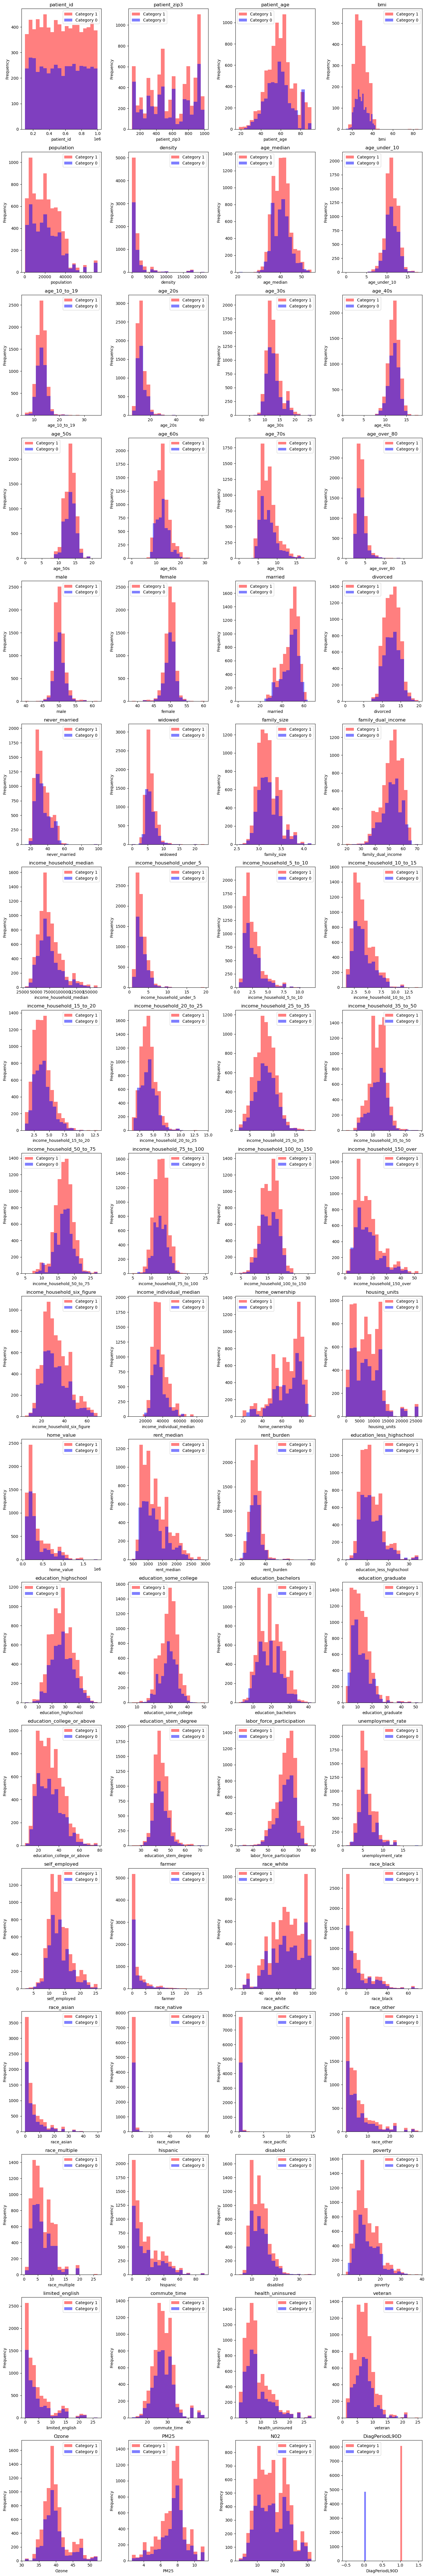

In [14]:
categorical_feature = 'DiagPeriodL90D'
categories = train[categorical_feature].unique()
colors = ['red', 'blue']

n_columns = 4  
n_rows = int(np.ceil(len(numerical_columns) / n_columns))

plt.figure(figsize=(15, 5 * n_rows)) 

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(n_rows, n_columns, i)  
    for j, category in enumerate(categories):
        category_data = train[train[categorical_feature] == category]
        plt.hist(category_data[col], bins=20, color=colors[j], alpha=0.5, label=f'Category {category}')
    
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.legend()
    
plt.tight_layout()
plt.show()

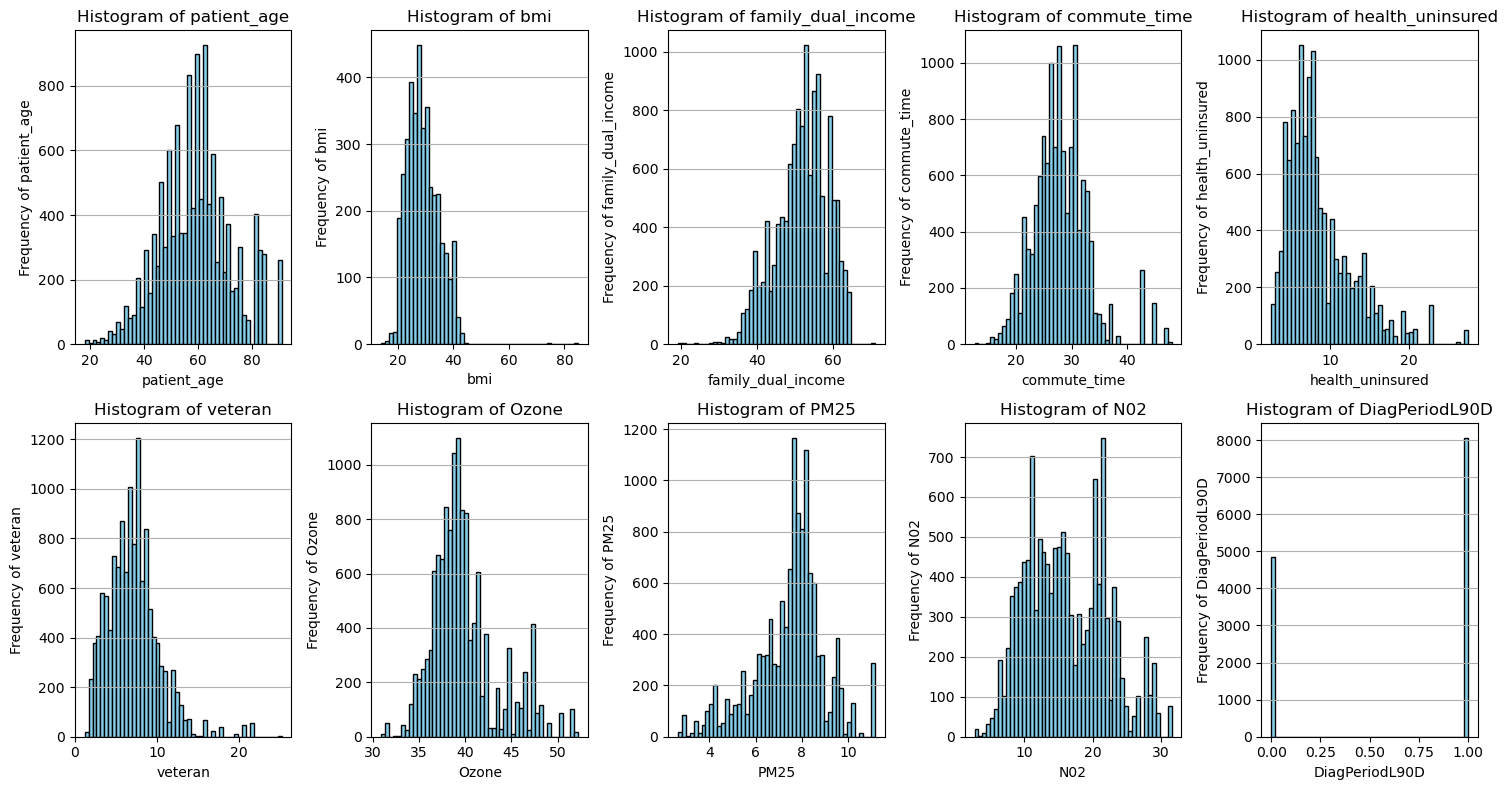

In [15]:
numeric_columns = ['patient_age', 'bmi', 'family_dual_income', 'commute_time', 'health_uninsured', 
                   'veteran', 'Ozone', 'PM25', 'N02', 'DiagPeriodL90D']

n_rows = 2
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))  
axes = axes.flatten() 

for i, column in enumerate(numeric_columns):
    ax = axes[i]  
    ax.hist(train[column].dropna(), bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel(f'Frequency of {column}')
    ax.grid(axis='y')

plt.tight_layout()
plt.show() 

<Figure size 1200x600 with 0 Axes>

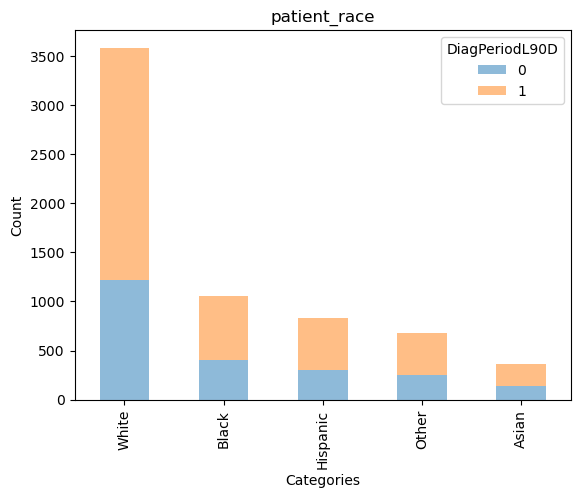

<Figure size 1200x600 with 0 Axes>

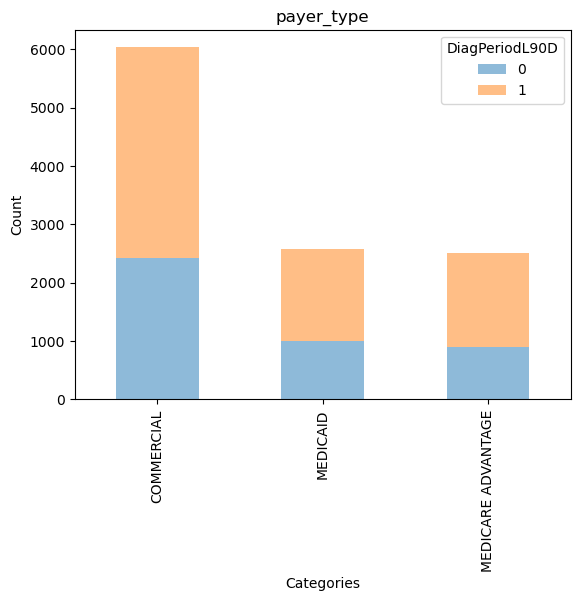

<Figure size 1200x600 with 0 Axes>

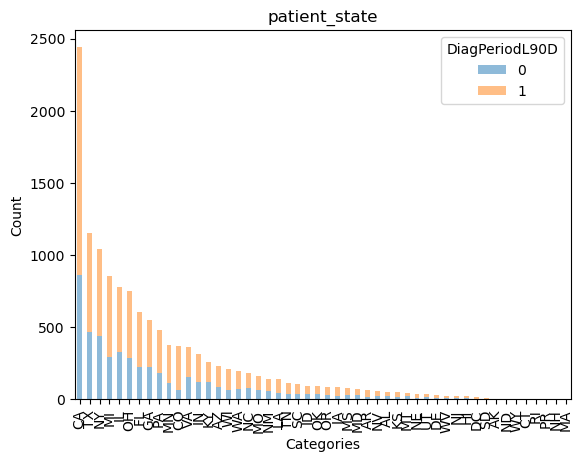

<Figure size 1200x600 with 0 Axes>

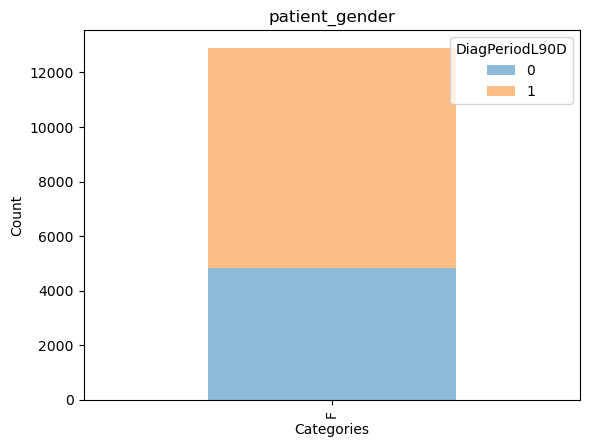

<Figure size 1200x600 with 0 Axes>

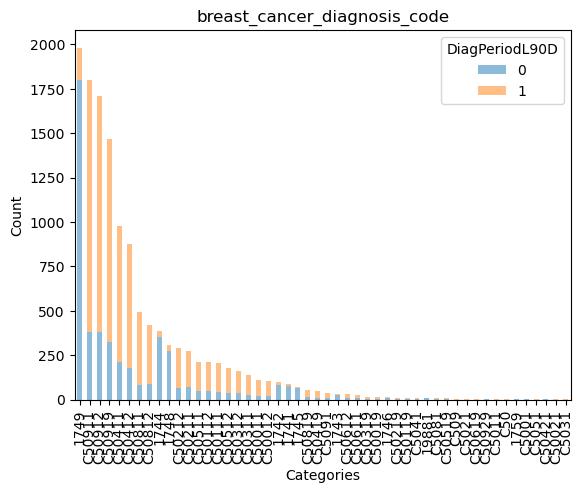

<Figure size 1200x600 with 0 Axes>

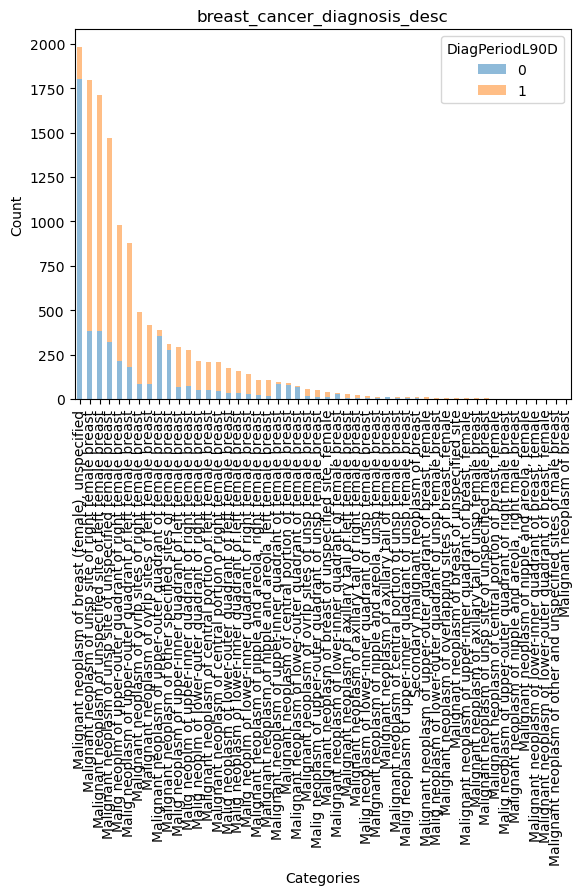

<Figure size 1200x600 with 0 Axes>

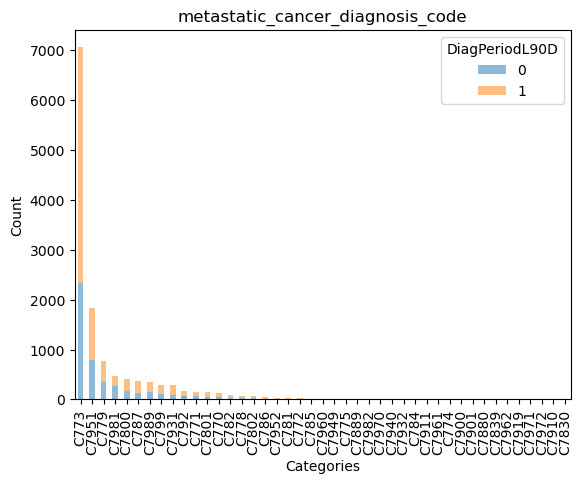

<Figure size 1200x600 with 0 Axes>

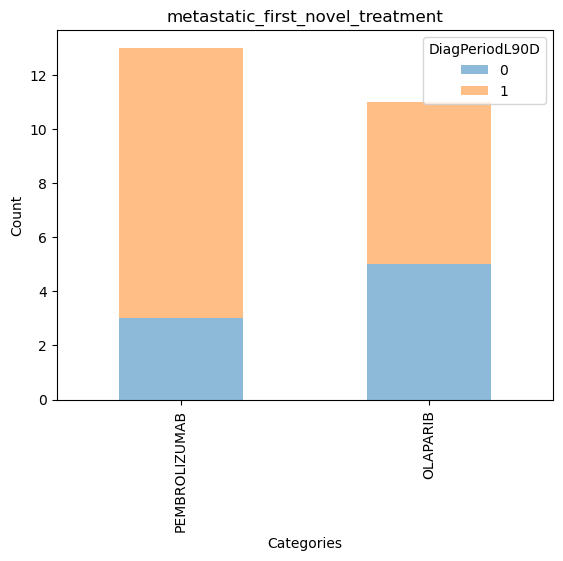

<Figure size 1200x600 with 0 Axes>

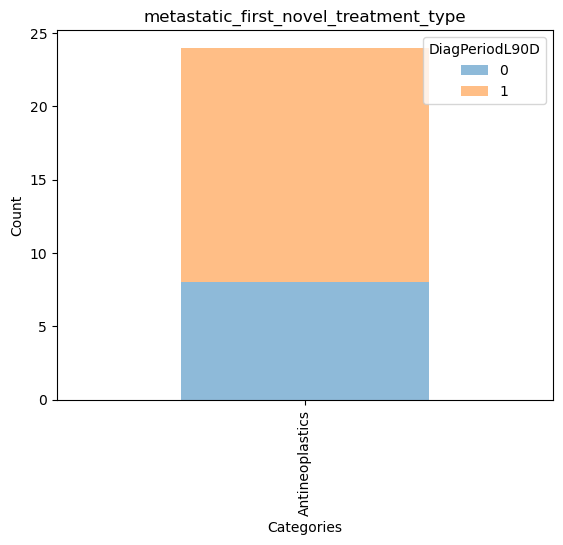

<Figure size 1200x600 with 0 Axes>

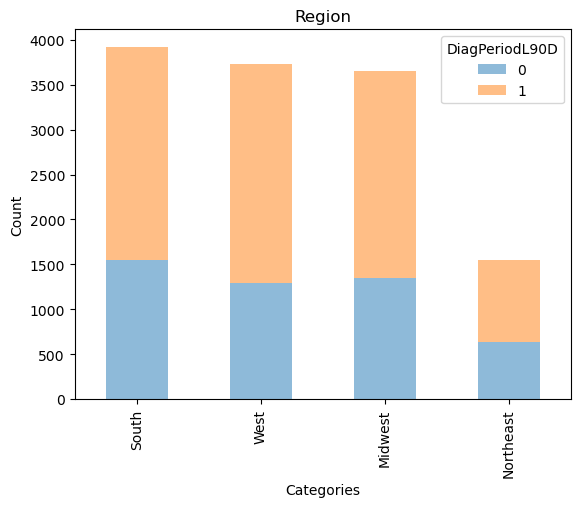

<Figure size 1200x600 with 0 Axes>

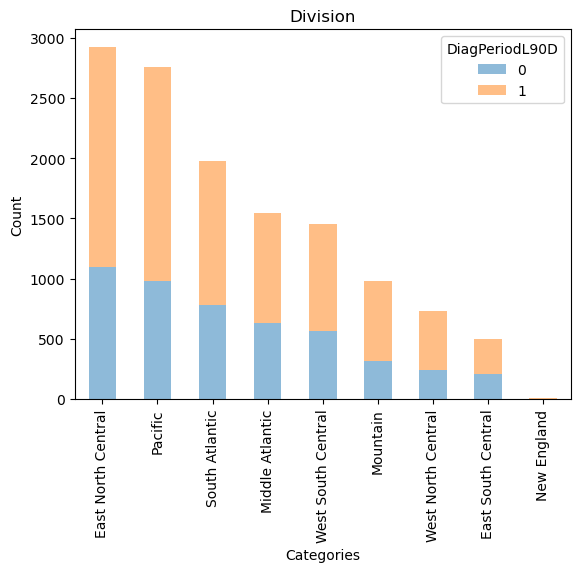

In [16]:
reference_column = 'DiagPeriodL90D'

reference_counts = train[reference_column].value_counts()
reference_categories = reference_counts.index
reference_values = reference_counts.values

for col in object_columns:
    plt.figure(figsize=(12, 6))
    
    category_counts = train.groupby([col, reference_column]).size().unstack(fill_value=0)
    category_counts['Total'] = category_counts.sum(axis=1)
    category_counts = category_counts.sort_values(by='Total', ascending=False)
    category_counts.drop('Total', axis=1, inplace=True)

    category_counts.plot(kind='bar', stacked=True, alpha=0.5)
    
    plt.title(col)
    plt.xticks(rotation=90)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend(title=reference_column, loc='upper right')
    plt.show()



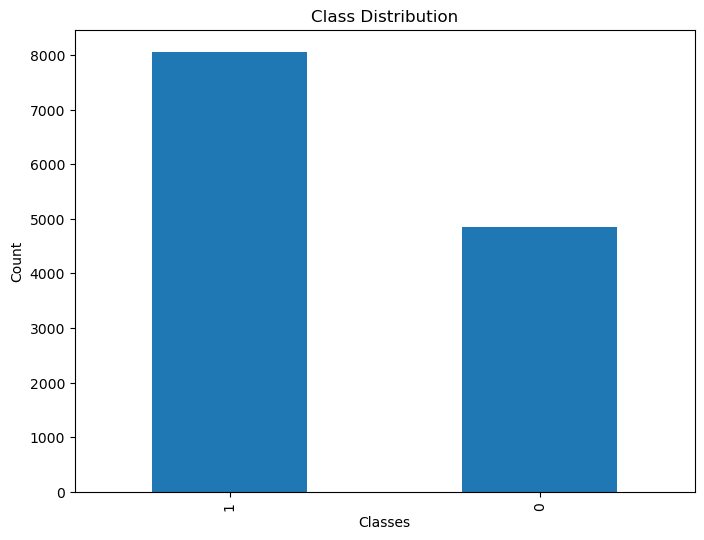

In [17]:
reference_column = "DiagPeriodL90D"

class_counts = train[reference_column].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


### The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if environmental hazards impact proper diagnosis and treatment.

In [18]:
unique_locations = train['breast_cancer_diagnosis_desc'].unique()

print("Unique Diagnosis Locations:", unique_locations)
nunique_locations = train['breast_cancer_diagnosis_desc'].nunique()
print("Number of Unique Locations:", nunique_locations)

Unique Diagnosis Locations: ['Malignant neoplasm of unsp site of unspecified female breast'
 'Malig neoplm of upper-outer quadrant of right female breast'
 'Malignant neoplasm of central portion of left female breast'
 'Malig neoplasm of upper-inner quadrant of left female breast'
 'Malignant neoplasm of breast (female), unspecified'
 'Malignant neoplasm of unspecified site of left female breast'
 'Malig neoplasm of lower-outer quadrant of left female breast'
 'Malignant neoplasm of upper-outer quadrant of female breast'
 'Malig neoplasm of upper-outer quadrant of left female breast'
 'Malignant neoplasm of ovrlp sites of left female breast'
 'Malignant neoplasm of unsp site of right female breast'
 'Malig neoplasm of lower-inner quadrant of left female breast'
 'Malig neoplm of lower-inner quadrant of right female breast'
 'Malignant neoplasm of central portion of right female breast'
 'Malignant neoplasm of central portion of female breast'
 'Malignant neoplasm of breast of unspecifi

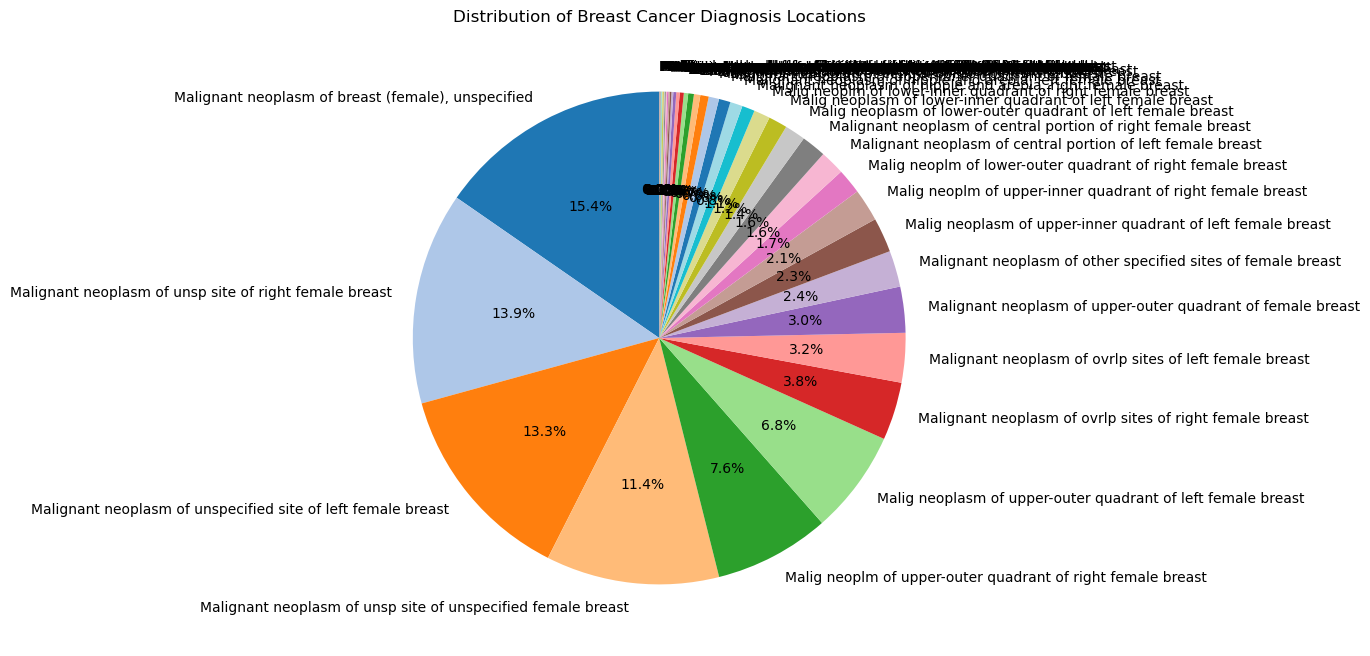

In [19]:
# Calculate the frequency of each unique location
location_counts = train['breast_cancer_diagnosis_desc'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('Distribution of Breast Cancer Diagnosis Locations')
plt.show()

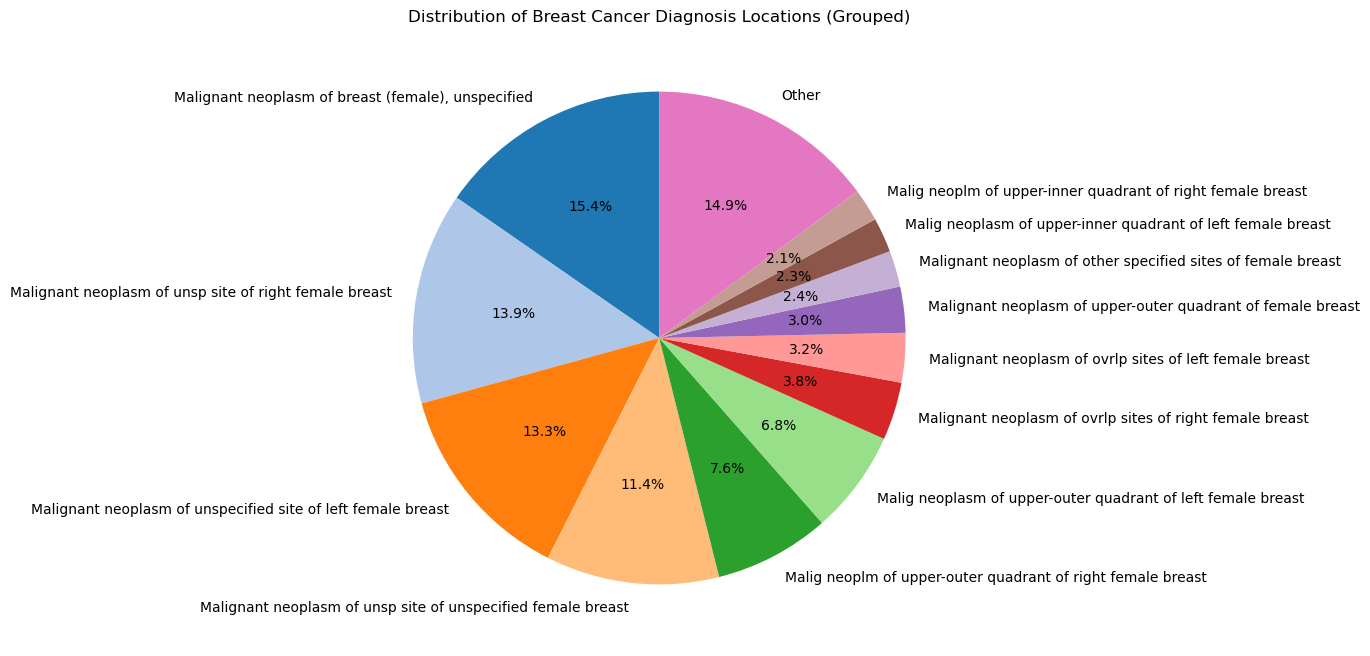

In [20]:
# Group smaller categories into 'Other'
threshold = 0.02  # Combine categories with less than 2% of the total
total = location_counts.sum()
location_counts = location_counts[location_counts / total >= threshold]
location_counts['Other'] = total - location_counts.sum()

# Plot the updated pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribution of Breast Cancer Diagnosis Locations (Grouped)')
plt.show()


Potentially create new features based on location of cancer/type to see if it's Metastatic TNBC yet then compare to based on demographic.

Eventually compare if diagnosis to the zip-code or region.

In [21]:
print(train.Region)

0             West
1             West
2            South
3             West
4             West
5        Northeast
6             West
7          Midwest
8              NaN
9          Midwest
10         Midwest
11            West
12         Midwest
13         Midwest
14            West
15            West
16       Northeast
17         Midwest
18       Northeast
19            West
20         Midwest
21           South
22       Northeast
23            West
24           South
25           South
26         Midwest
27         Midwest
28           South
29            West
30         Midwest
31       Northeast
32           South
33             NaN
34           South
35           South
36           South
37         Midwest
38         Midwest
39         Midwest
40           South
41            West
42           South
43            West
44         Midwest
45           South
46           South
47       Northeast
48            West
49       Northeast
50         Midwest
51       Northeast
52       Nor

In [22]:
# map of diagnosis per state
import pandas as pd
import plotly.express as px

# Group data by state and count `DiagPeriodL90D` occurrences
state_diagnosis = train.groupby('patient_state')['DiagPeriodL90D'].count().reset_index()
state_diagnosis.columns = ['State', 'Diagnosis Count']

In [23]:
# Load map and visualize
fig = px.choropleth(
    state_diagnosis,
    locations='State', 
    locationmode='USA-states',
    color='Diagnosis Count', 
    color_continuous_scale='Reds', 
    scope='usa', 
    title='Diagnosis Count by State'
)

fig.update_layout(
    geo=dict(lakecolor='rgb(255, 255, 255)')  # Make lakes white
)
fig.show()


In [24]:
#Create a map for each pollutant
pollutants = ['Ozone', 'PM25', 'N02']
state_pollutants = train.groupby('patient_state')[pollutants].mean().reset_index()

for pollutant in pollutants:
    fig = px.choropleth(
        state_pollutants,
        locations='patient_state',  
        locationmode='USA-states',
        color=pollutant, 
        color_continuous_scale='Viridis', 
        scope='usa', 
        title=f'Average {pollutant} Levels by State'
    )
    
    fig.update_layout(
        geo=dict(lakecolor='rgb(255, 255, 255)')  
    )
    
    fig.show()

In [25]:
#correlation matrix
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = train[numerical_columns].corr()

print("Correlation Table:")
print(correlation_matrix)


Correlation Table:
                             patient_id  patient_zip3  patient_age       bmi  \
patient_id                     1.000000      0.020582     0.008109 -0.005282   
patient_zip3                   0.020582      1.000000    -0.062820 -0.048912   
patient_age                    0.008109     -0.062820     1.000000 -0.063885   
bmi                           -0.005282     -0.048912    -0.063885  1.000000   
population                     0.001216      0.098969    -0.018048 -0.037956   
density                       -0.007420     -0.196672    -0.002532 -0.003744   
age_median                     0.005052     -0.148139     0.040121 -0.023318   
age_under_10                  -0.004164      0.057007    -0.026532  0.056463   
age_10_to_19                  -0.018012      0.032373    -0.029747  0.006254   
age_20s                       -0.003972      0.095140    -0.020619  0.001980   
age_30s                        0.005831      0.166875    -0.023544 -0.005806   
age_40s              

In [26]:
# Filter correlations
strong_corr = correlation_matrix[abs(correlation_matrix) > 0.5]

print(strong_corr)


                             patient_id  patient_zip3  patient_age  bmi  \
patient_id                          1.0           NaN          NaN  NaN   
patient_zip3                        NaN      1.000000          NaN  NaN   
patient_age                         NaN           NaN          1.0  NaN   
bmi                                 NaN           NaN          NaN  1.0   
population                          NaN           NaN          NaN  NaN   
density                             NaN           NaN          NaN  NaN   
age_median                          NaN           NaN          NaN  NaN   
age_under_10                        NaN           NaN          NaN  NaN   
age_10_to_19                        NaN           NaN          NaN  NaN   
age_20s                             NaN           NaN          NaN  NaN   
age_30s                             NaN           NaN          NaN  NaN   
age_40s                             NaN           NaN          NaN  NaN   
age_50s                  